# Position data

In [1]:
import datetime
import pickle

import matplotlib.pyplot as plt
import numpy as np

WIDTH = 70


def compute_mean_std(inp):
    mean = inp.mean(axis=1)
    std = inp.std(axis=1)
    return mean, std


def preprocess(x, y):
    position = np.vstack((x, y))
    mean, std = compute_mean_std(position)
    print(f"mean:{mean}, std:{std}")
    position = (position.T - mean) / std
    return position


def compute_l2_norm(x, y):
    dist = list()
    points = list(zip(x, y))
    for p in range(len(points) - 1):
        dist.append(np.linalg.norm(np.array(points[p]) - np.array(points[p + 1])))
    return sum(dist)


with open("brands-hatch-indy.pickle", "rb") as f:
    data = pickle.load(f)  # noqa: S301

x = [x[0] for x in data[1]]
y = [-x[1] for x in data[1]]  # remove minus sign for pygame.draw.line() in minimap.py

distance = compute_l2_norm(x, y)
print(f"distance driven:\t{distance * 1e-3:.4f} km")

laptime = str(datetime.timedelta(seconds=len(x) * 1 / 60))
print(f"lap time:\t\t{laptime}")

position = preprocess(x, y)
position *= WIDTH

x = position[:, 0]
y = position[:, 1]

distance driven:	1.8914 km
lap time:		0:01:04.100000
mean:[-98.43143378 269.27969512], std:[196.47067901 113.8373942 ]


-107.6
-0.1
-0.2
-0.3
-0.5
-0.6
-0.7
-0.9
-1.0
-1.2
-1.2
-1.3
-1.3
-1.4
-1.4
-1.5
-1.6
-1.7
-1.7
-1.8
-1.9
-2.0
-2.0
-2.1
-2.1
-2.1
-2.2
-2.3
-2.3
-2.4
-2.6
-2.7
-2.8
-2.9
-3.0
-3.1
-3.1
-3.2
-3.3
-3.4
-3.4
-3.5
-3.5
-3.6
-3.6
-3.6
-3.6
-3.6
-3.6
-3.5
-3.5
-3.4
-3.4
-3.4
-3.3
-3.3
-3.2
-3.2
-3.1
-3.1
-3.1
-3.1
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-2.9
-2.9
-2.8
-2.8
-2.8
-2.8
-2.8
-3.0
-3.1
-3.1
-3.0
-2.8
-2.8
-2.7
-2.6
-2.5
-2.4
-2.3
-2.2
-2.1
-2.0
-2.0
-1.9
-1.8
-1.8
-1.7
-1.7
-1.7
-1.6
-1.6
-1.6
-1.7
-1.7
-1.7
-1.6
-1.5
-1.5
-1.5
-1.5
-1.4
-1.3
-1.3
-1.2
-1.1
-1.1
-1.0
-0.9
-0.8
-0.7
-0.6
-0.5
-0.5
-0.4
-0.4
-0.4
-0.4
-0.5
-0.5
-0.6
-0.7
-0.7
-0.8
-0.9
-1.0
-1.1
-1.2
-1.3
-1.4
-1.5
-1.6
-1.7
-1.8
-1.9
-2.1
-2.2
-2.3
-2.4
-2.5
-2.5
-2.6
-2.7
-2.8
-2.9
-2.9
-3.0
-3.1
-3.3
-3.4
-3.4
-3.4
-3.4
-3.4
-3.4
-3.4
-3.5
-3.5
-3.6
-3.6
-3.7
-3.7
-3.8
-3.9
-4.0
-4.1
-4.3
-4.3
-4.3
-4.2
-4.1
-4.0
-3.9
-3.9
-3.9
-3.8
-3.7
-3.6
-3.6
-3.5
-3.5
-3.5
-3.5
-3.5
-3.5
-3.4
-3.4


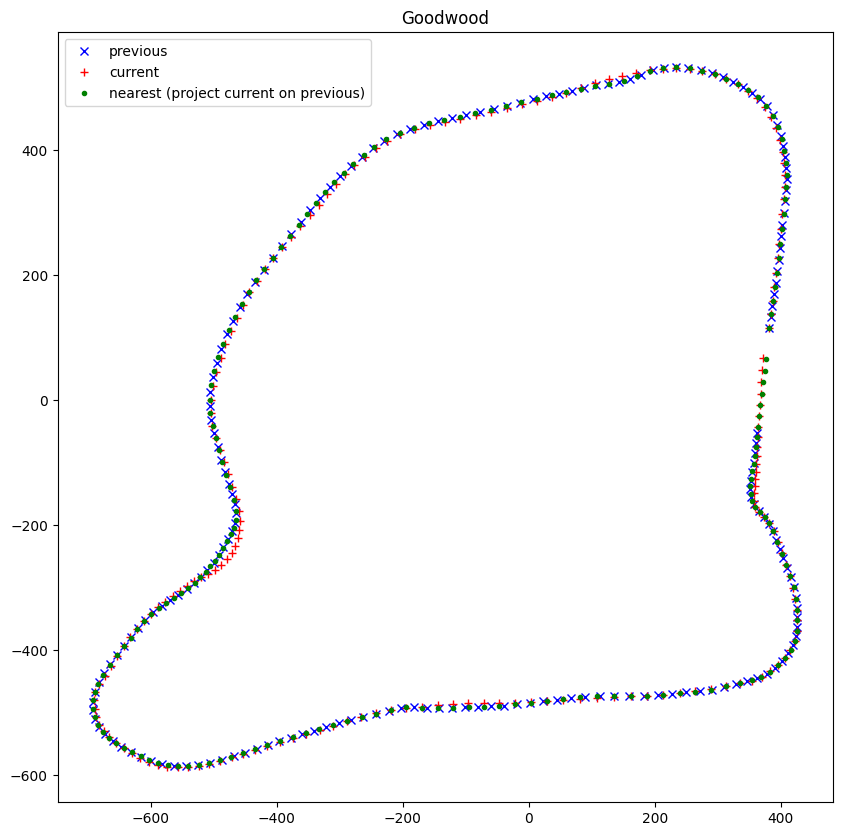

In [2]:
%matplotlib inline
import pickle

import mpld3
from scipy.spatial import KDTree
from shapely.geometry import LineString, Point
from shapely.ops import nearest_points

mpld3.enable_notebook()

INDEX = 6200
STEP = 32
prev_track_route = None

with open("track-positions-lap-1.pickle", "rb") as f:
    prev_track_positions = pickle.load(f)  # noqa: S301
    prev_track_route = LineString(prev_track_positions.keys())

with open("track-positions-lap-2.pickle", "rb") as f:
    current_track_positions = pickle.load(f)  # noqa: S301


points = list(prev_track_positions.keys())
track = KDTree(points)


fig, ax = plt.subplots(figsize=(10, 10))

plt.title("Goodwood")

tx, ty = prev_track_route.xy
ax.plot(
    tx[0:INDEX:STEP],
    ty[0:INDEX:STEP],
    color="blue",
    marker="x",
    label="previous",
    linestyle="None",
)

for i in range(0, INDEX, STEP):
    pos = list(current_track_positions)[i]

    curr_position = Point(pos[0], pos[1])
    ax.plot(
        curr_position.x,
        curr_position.y,
        color="red",
        marker="+",
        label="current",
        linestyle="None",
    )

    dist, ind = track.query((curr_position.x, curr_position.y), k=1)

    # print(f"KD tree -- distance: {dist}, index: {ind}, coord: {points[ind]}")
    # print(f"checkpoint time: {prev_track_positions[points[ind]]}")

    nearest = nearest_points(prev_track_route, curr_position)[0]
    ax.plot(
        nearest.x,
        nearest.y,
        color="green",
        marker=".",
        label="nearest (project current on previous)",
        linestyle="None",
    )

    # print(f"previous (a): {list(prev_track_positions)[i]}")
    # print(f"previous (b): {tx[i]}, {ty[i]}")
    # print(f"current: {list(current_track_positions)[i]}")
    # print(f"nearest: {nearest.x}, {nearest.y}")
    # print("\n")

    delta_laptime = 0
    if (points[ind][0], points[ind][1]) in points:
        delta_laptime = current_track_positions[pos] - prev_track_positions[points[ind]]
    estimated_laptime = f"{delta_laptime:.1f}"
    print(estimated_laptime)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left")

plt.show()